# Exercise 6
The code below loads the Sepsis dataset from the UCI repository (https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records).    
This dataset is divided into train and test sets and scaled.  
Then a *k*NN classifier is trained and tested. The time to classify the test data is also recorded.   
`scikit-learn` provides two strategies to speed up *k*-NN, `ball_tree` and `kd_tree`.  
Compare the performance of these two algorithms with brute force search `brute`.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# fetch Sepsis dataset 
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827) 

## Model Performance

### Data Preprocessing
Before we can move onto model training, we first need to split our dataset into a train test split and normalise

### Brute Force Search
This section defines a brute force search 3-NN model and assessed its performance.  

In [3]:
# Load the features into a dataframe
X_raw = sepsis_survival_minimal_clinical_records.data.features

# Load targets into a numpy array
y = sepsis_survival_minimal_clinical_records.data.targets.values.ravel()

# Print the shapes
X_raw.shape, y.shape

((110341, 3), (110341,))

In [4]:
X_raw

,age_years,sex_0male_1female,episode_number
0,21,1,1
1,20,1,1
2,21,1,1
3,77,0,1
4,72,0,1
...,...,...,...
110336,47,0,1
110337,50,0,1
110338,62,0,1
110339,58,0,1


In [5]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [6]:
# Assign the input features and targets into a train test split.
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, test_size=1/3)

# Apply a scaler to input features.
scaler = StandardScaler().fit(X_tr_raw)

# Scale the training data using the scaler object.
X_train = scaler.transform(X_tr_raw)

# Scale the test data using the same scaler object (which has only seen the training data).
X_test = scaler.transform(X_ts_raw)

# Output train and test shapes
X_train.shape, X_test.shape

((73560, 3), (36781, 3))

In [7]:
# Define the 3-NN brute force classifier
Sep_kNN = KNeighborsClassifier(n_neighbors=3, algorithm = 'brute') 

# Fit the classifier to the training data
Sep_kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [8]:
t_start = time.time()       
acc = Sep_kNN.score(X_test,y_test)
t = time.time()-t_start
print('Time: %5.2f Accuracy: %5.2f' % (t, acc))

Time: 10.86 Accuracy:  0.91


In [9]:
Sep_kNN.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### Ball Tree 
This section defines a ball tree search 3-NN model and assessed its performance. 

In [10]:
# Define the 3-NN brute force classifier
Sep_kNN_ball_tree = KNeighborsClassifier(n_neighbors=3, algorithm = 'ball_tree') 

# Fit the classifier to the training data
Sep_kNN_ball_tree.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [11]:
t_start = time.time()       
acc = Sep_kNN_ball_tree.score(X_test,y_test)
t = time.time()-t_start
print('Time: %5.2f Accuracy: %5.2f' % (t, acc))

Time:  7.75 Accuracy:  0.92


In [12]:
Sep_kNN_ball_tree.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### KD Tree 
This section defines a KD tree search 3-NN model and assessed its performance. 

In [13]:
# Define the 3-NN brute force classifier
Sep_kNN_kd_tree = KNeighborsClassifier(n_neighbors=3, algorithm = 'kd_tree') 

# Fit the classifier to the training data
Sep_kNN_kd_tree.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [14]:
t_start = time.time()       
acc = Sep_kNN_kd_tree.score(X_test,y_test)
t = time.time()-t_start
print('Time: %5.2f Accuracy: %5.2f' % (t, acc))

Time:  6.36 Accuracy:  0.92


In [15]:
Sep_kNN_kd_tree.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### Performance Analysis
This section will discuss how the different search algorithms contributed to the time taken to process queries and the models overall accuracy.

#### Time taken to process 36781 queries


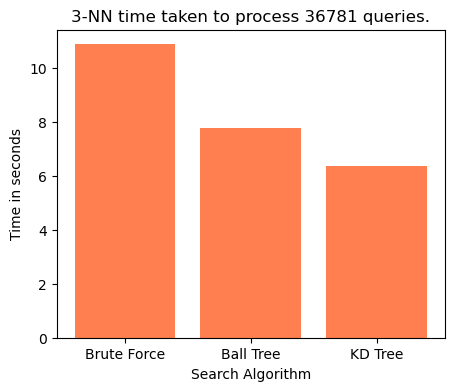

In [24]:
plt.figure(figsize=(5,4))
search_algos = ["Brute Force", "Ball Tree", "KD Tree"]
time_taken = [10.86, 7.75, 6.36]

plt.bar(search_algos, time_taken, align="center", color="coral")
plt.ylabel("Time in seconds")
plt.xlabel("Search Algorithm")
plt.title("3-NN time taken to process 36781 queries.")
plt.show()

#### Model Accuracy

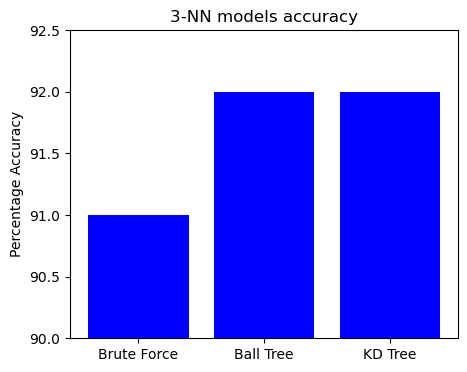

In [25]:
plt.figure(figsize=(5,4))
accuracy = [91, 92, 92]
plt.bar(search_algos, accuracy, align="center", color="blue")
plt.ylim((90,92.5))
plt.ylabel("Percentage Accuracy")
plt.title("3-NN models accuracy")
plt.show()